Solution of the exercises
=========================

In [1]:
import numpy as np
from math import pi
%matplotlib inline
from pytriqs.plot.mpl_interface import plt,oplot
# change scale of all figures to make them bigger
import matplotlib as mpl
mpl.rcParams['savefig.dpi']=100 

Solution of exercise 1
----------------------

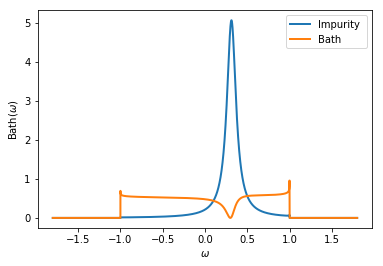

In [2]:
from pytriqs.gf import *

eps_d, V  = 0.3, 0.2
g = GfReFreq(indices = ['s','d'], window = (-2, 2), name = "s+d")
g['d','d'] << Omega - eps_d
g['d','s'] << V
g['s','d'] << V
g['s','s'] << inverse( Flat(1.0) )
g.invert()
oplot( -g['d','d'].imag/pi, '-', lw=2, x_window  = (-1.8,1.8), name = "Impurity" )
oplot( -g['s','s'].imag/pi, '-', lw=2, x_window  = (-1.8,1.8), name = "Bath" )

Solution of exercise 2
----------------------

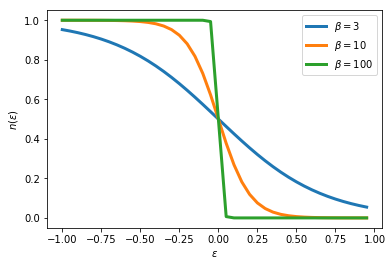

In [3]:
for beta in [3, 10, 100]:
    g = GfImFreq(indices=[0], beta=beta)
    eps_r = np.arange(-1,1,0.05)
    n_r = []
    for eps in eps_r:
        g << inverse(iOmega_n - eps)
        n_r.append(g.density()[0,0].real)
    plt.plot(eps_r, n_r, lw=3, label=r"$\beta = %i$"%beta)
plt.xlabel('$\epsilon$')
plt.ylabel('$n(\epsilon)$')
plt.legend()

Solution of exercise 3
----------------------

(-3.5, 0.1)

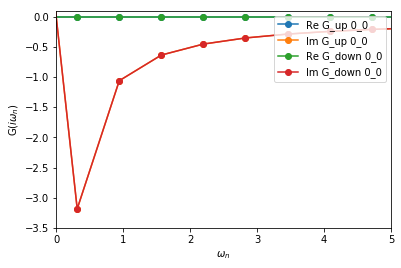

In [4]:
g_up = GfImFreq(indices=[0], beta=10)
g_down = GfImFreq(indices=[0], beta=10)
G = BlockGf(name_list=['up', 'down'], block_list=[g_up, g_down])

# Loop over the blocks
for name, g in G:
    g << inverse(iOmega_n)

oplot(G, '-o')
plt.xlim(0,5)
plt.ylim(-3.5,0.1)

Solution of exercise 4
----------------------

(0, 10)

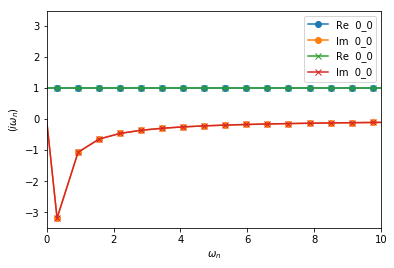

In [6]:
U = 2.0

g_0 = GfImFreq(indices=[0], beta=10)
g = GfImFreq(indices=[0], beta=10)
sigma = GfImFreq(indices=[0], beta=10)
sigma_check = GfImFreq(indices=[0], beta=10)

# Green's functions of the Hubbard atom
g_0 << inverse(iOmega_n + U/2)
g << 0.5*inverse(iOmega_n + U/2) + 0.5*inverse(iOmega_n - U/2)

# Dyson's equation to find the self-energy
sigma << inverse(g_0) - inverse(g)

# Known solution
sigma_check << U/2 + U*inverse(2*iOmega_n)

oplot(sigma, '-o')
oplot(sigma_check, '-x')
plt.xlim(0,10)

Solution of exercise 5
----------------------

(0, 10)

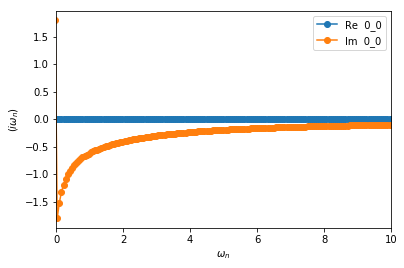

In [7]:
# Set U
U = 2.0
beta = 100

# Define and initialize G0 in freq
g0_w = GfImFreq(indices=[0], beta=beta)
g0_w << SemiCircular(1.0)

# We will need these
g0_t = GfImTime(indices=[0], beta=beta)
sigma_t = GfImTime(indices=[0], beta=beta)
sigma_w = GfImFreq(indices=[0], beta=beta)
g_w = GfImFreq(indices=[0], beta=beta)

# Compute second-order self-energy
g0_t << InverseFourier(g0_w)
sigma_t << U**2 * g0_t * g0_t * g0_t
sigma_w << Fourier(sigma_t)

# Dyson's equation
g_w << inverse(inverse(g0_w) - sigma_w)

oplot(g_w, '-o')
plt.xlim(0,10)

Solution of exercise 6
----------------------

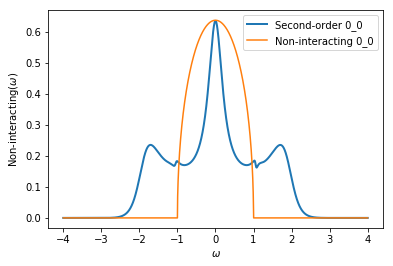

In [8]:
g_r = GfReFreq(indices=[0], window=[-4,4])
g_r.set_from_pade(g_w)
oplot(-g_r.imag/pi, lw=2, name="Second-order")

g0_r = GfReFreq(indices=[0], window=[-4,4])
g0_r << SemiCircular(1.0)
oplot(-g0_r.imag/pi, name="Non-interacting")